#### Antibiotic Drug Discovery
#### Corey J Sinnott
# Drug Import and Featurization I

## Executive Summary

This report was commissioned to determine a robust, fast, and reproducible means of searching for, and developing, new antibiotics, in an effort to combat antibiotic resistance. After in-depth analysis, conclusions and recommendations will be presented.
   
Data was obtained from the following source:
- Comprehensive Antibiotic Resistance Database via CARD CLI interface: 
 - https://card.mcmaster.ca
- ChEMBL via Python client library: 
 - https://www.ebi.ac.uk/chembl/ 

**Full Executive Summary, Conclusion, Recommendations, Data Dictionary and Sources can be found in README.**

## Contents:
- [Data Import & Cleaning](#Data-Import-&-Cleaning)
- [Developing Search Pipeline](#Developing-Search-Pipeline)
- [Feature Engineering](#Feature-Engineering)

#### Importing Libraries

In [3]:
import pandas as pd
from chembl_webresource_client.new_client import new_client
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [149]:
import warnings
warnings.filterwarnings("ignore")

# Developing Search Pipeline
- Using one randomly chosen bacteria: Acinetobacter baumannii 

Accessing ChEMBL database via web-client:

In [24]:
target = new_client.target

In [25]:
target_search = target.search('Acinetobacter baumannii')

In [26]:
target_df = pd.DataFrame.from_dict(target_search)

In [27]:
target_df.head(10)

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Acinetobacter baumannii,Acinetobacter baumannii,32.0,False,CHEMBL614425,[],ORGANISM,470
1,[],Acinetobacter,Acinetobacter,16.0,False,CHEMBL614424,[],ORGANISM,469
2,[],Acinetobacter calcoaceticus,Acinetobacter calcoaceticus,14.0,False,CHEMBL614426,[],ORGANISM,471
3,[],Acinetobacter sp.,Acinetobacter sp.,14.0,False,CHEMBL614427,[],ORGANISM,472
4,[],Acinetobacter lwoffii,Acinetobacter lwoffii,14.0,False,CHEMBL613778,[],ORGANISM,28090
5,[],Acinetobacter haemolyticus,Acinetobacter haemolyticus,14.0,False,CHEMBL613782,[],ORGANISM,29430
6,[],Acinetobacter radioresistens,Acinetobacter radioresistens,14.0,False,CHEMBL2366968,[],ORGANISM,40216
7,[],Acinetobacter pittii,Acinetobacter pittii,14.0,False,CHEMBL3140321,[],ORGANISM,48296
8,[],Acinetobacter calcoaceticus subsp. anitratus,Acinetobacter calcoaceticus subsp. anitratus,11.0,False,CHEMBL612453,[],ORGANISM,107673
9,"[{'xref_id': 'Q2TR58', 'xref_name': None, 'xre...",Acinetobacter baumannii,Carbapenem-hydrolyzing oxacillinase OXA-58,11.0,False,CHEMBL5153,"[{'accession': 'Q2TR58', 'component_descriptio...",SINGLE PROTEIN,470


In [28]:
#picking based on visual inspection
#choosing a broader term for more results

select_target = target_df.target_chembl_id[0]

In [29]:
select_target #verifying

'CHEMBL614425'

In [30]:
activity = new_client.activity

Filtering for results that have an Minimum Inhibitory Concentration (MIC) value:

In [31]:
#trying to filter by MIC occasionally breaks kernel
# -> works consistently in app

res = activity.filter(target_chembl_id = select_target).filter(standard_type=['MIC'])

In [164]:
df_test = pd.DataFrame.from_dict(res)

In [165]:
df_test.sample(5)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
1311,None,3385698,[],CHEMBL1221120,Antimicrobial activity against Acinetobacter b...,F,None,None,BAO_0002146,BAO_0000218,...,Acinetobacter baumannii,Acinetobacter baumannii,470,None,None,MIC,ug ml-1,UO_0000274,None,32.0
3396,None,5228199,[],CHEMBL1680415,Antibacterial activity against Acinetobacter b...,F,None,None,BAO_0002146,BAO_0000218,...,Acinetobacter baumannii,Acinetobacter baumannii,470,None,None,MIC,ug ml-1,UO_0000274,None,256.0
2259,None,5099099,[],CHEMBL1638694,Antimicrobial activity against Acinetobacter b...,F,None,None,BAO_0002146,BAO_0000218,...,Acinetobacter baumannii,Acinetobacter baumannii,470,None,None,MIC,ug ml-1,UO_0000274,None,256.0
8989,Median N= 2; Maxinhib 12.8 Pct,20217065,[],CHEMBL4296188,Antibacterial activity against Acinetobacter b...,F,None,None,BAO_0002146,BAO_0000218,...,Acinetobacter baumannii,Acinetobacter baumannii,470,None,None,MIC,uM,UO_0000065,None,300.0
9342,Median N= 2; Maxinhib 24.9 Pct,20241337,[],CHEMBL4296188,Antibacterial activity against Acinetobacter b...,F,None,None,BAO_0002146,BAO_0000218,...,Acinetobacter baumannii,Acinetobacter baumannii,470,None,None,MIC,uM,UO_0000065,None,20.0


In [166]:
df_test.shape

(9468, 45)

In [167]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9468 entries, 0 to 9467
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   activity_comment           1405 non-null   object 
 1   activity_id                9468 non-null   int64  
 2   activity_properties        9468 non-null   object 
 3   assay_chembl_id            9468 non-null   object 
 4   assay_description          9468 non-null   object 
 5   assay_type                 9468 non-null   object 
 6   assay_variant_accession    0 non-null      object 
 7   assay_variant_mutation     0 non-null      object 
 8   bao_endpoint               9468 non-null   object 
 9   bao_format                 9468 non-null   object 
 10  bao_label                  9468 non-null   object 
 11  canonical_smiles           9436 non-null   object 
 12  data_validity_comment      235 non-null    object 
 13  data_validity_description  235 non-null    objec

In [168]:
df_test['standard_value'].isna().value_counts()

False    9160
True      308
Name: standard_value, dtype: int64

In [169]:
df_test['standard_value'] = df_test['standard_value'].astype(float)

In [170]:
#dropping null standard values
df_test = df_test.dropna(subset = ['standard_value'])

In [171]:
df_test.shape

(9160, 45)

In [114]:
# ! new ! #

# df_test.set_index(keys = 'molecule_chembl_id', inplace = True)

In [40]:
# the standard value column accounts for the different units
# all converted to nM
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3965067/
df_test['units'].value_counts()

ug ml-1        6034
uM             2419
mg/L            372
ug.mL-1         214
mM               49
umol/ml          30
mg/ml            27
mg l-1            7
ug/L              4
10'-4 ug/ml       2
nM                1
uM/ml             1
Name: units, dtype: int64

In [41]:
df_test['standard_value'].describe()

count    9.160000e+03
mean     3.394642e+04
std      2.122256e+05
min      9.800000e-04
25%      7.725000e+00
50%      3.200000e+01
75%      1.024000e+03
max      8.000000e+06
Name: standard_value, dtype: float64

In [172]:
df_trim = df_test[['canonical_smiles', 'standard_value']]

Classifying results:

In [175]:
#separate column for binary classification

def binary_bioactivity_rater(col):
    """
    """
    bio_activity_rate_binary = []
    for i in col:
        if i <= 33: # need to research; for now tuned to get balanced classes
            bio_activity_rate_binary.append('active')
        else:
            bio_activity_rate_binary.append('inactive')
            
    bioactivity_binary = pd.Series(bio_activity_rate_binary)
    
    return bioactivity_binary

In [173]:
df_trim['bioactivity_binary'] = np.where(df_trim['standard_value'] < 33, 'active', 'inactive')

In [174]:
df_trim['bioactivity_binary_class'] = np.where(df_trim['standard_value'] > 33, 0, 1)

In [180]:
df_trim.shape

(9160, 4)

In [203]:
#creating column for multiclass classification

def bioactivity_rater(df, col):
    """
    """
    bio_activity_rate = []
    for i in col:
        if i <= 25: # need to research; for now tuned to get balanced classes
            bio_activity_rate.append('active')
        elif i > 500:
            bio_activity_rate.append('inactive')
#         elif i > 1000 and i < 9000:
#             bio_activity_rate.append('intermediate_weak') # too few in this class
        else:
            bio_activity_rate.append('intermediate')
            
    bioactivity_multiclass = pd.Series(bio_activity_rate, name = 'bioactivity_multiclass')
    df_merge = pd.concat([df.reset_index(), bioactivity_multiclass], axis = 1)
    
    return df_merge

In [208]:
df_trim = bioactivity_rater(df_trim, df_trim['standard_value'])

In [211]:
df_trim.sample(5)

,index,canonical_smiles,standard_value,bioactivity_binary,bioactivity_binary_class,bioactivity_multiclass
3926,4009,CC(C)C[C@@H]1NC(=O)[C@@H](Cc2ccccc2)NC(=O)[C@H...,2.0,active,1,active
2473,2517,C[C@H]1[C@H](NC(=O)/C(=N\OC(C)(C)C(=O)O)c2csc(...,256.0,inactive,0,intermediate
555,555,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccc(O)cc3)...,128.0,inactive,0,intermediate
3790,3870,COc1cccc(N2CCN(Cc3oc(CCl)cc(=O)c3O)CC2)c1,64.0,inactive,0,intermediate
5925,6111,CN(C)CCNCc1cc2cc3c(cc2n1C)CCCc1c-3[nH]c(=O)c(C...,62.5,inactive,0,intermediate


In [212]:
# may need to append a bulk list of other antibiotics
# or drop intermediates to get enough separation b/n classes
df_trim['bioactivity_multiclass'].value_counts()

active          3633
intermediate    2955
inactive        2572
Name: bioactivity_multiclass, dtype: int64

In [207]:
#convert multiclass column to binary and acheive better separation
# by deleting intermediate
df_trim['bioactivity_binary'].value_counts()

active      4638
inactive    4522
Name: bioactivity_binary, dtype: int64

In [217]:
df = df_trim

In [218]:
df.shape

(9160, 6)

Exporting results:

In [220]:
#df.to_csv('acinetobacter_baumannii_MIC.csv')

# Feature Engineering
- Adding Lipinski Descriptors via RDKit library
    - Molecular weight
    - log-p
    - Proton donors
    - Proton acceptors

In [221]:
df.canonical_smiles.isna().value_counts()

False    9128
True       32
Name: canonical_smiles, dtype: int64

In [228]:
df = df.dropna(subset = ['canonical_smiles']).drop(columns = 'index')

In [229]:
df.shape

(9128, 5)

In [63]:
%%time
#proof of concept for function
test = [round(Descriptors.MolWt(Chem.MolFromSmiles(i)), 3) for i in df_use['canonical_smiles']]

CPU times: user 4.41 s, sys: 19.8 ms, total: 4.43 s
Wall time: 4.44 s


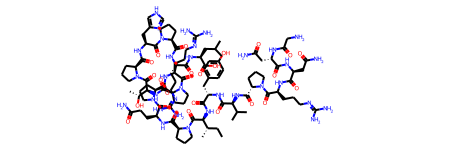

In [241]:
Chem.MolFromSmiles(df.canonical_smiles[4])

In [230]:
df.canonical_smiles[4]

'CC[C@H](C)[C@H](NC(=O)[C@H](Cc1ccc(O)cc1)NC(=O)[C@@H](NC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCN=C(N)N)NC(=O)[C@H](CC(N)=O)NC(=O)[C@H](CC(N)=O)NC(=O)CN)C(C)C)C(=O)N1CCC[C@H]1C(=O)N[C@@H](CCC(N)=O)C(=O)N1CCC[C@H]1C(=O)N[C@@H](CCCN=C(N)N)C(=O)N1CCC[C@H]1C(=O)N[C@H](C(=O)N1CCC[C@H]1C(=O)N[C@@H](Cc1c[nH]cn1)C(=O)N1CCC[C@H]1C(=O)N[C@@H](CCCN=C(N)N)C(=O)N[C@@H](CC(C)C)C(=O)O)[C@@H](C)O'

In [231]:
test[4]

2209.551

In [85]:
# original version of the following function
# v2 is much faster

# def add_mol_feats(df, df_col):
#     """
#     Creates a new dataframe with four new molecular descriptors: molecular
#     weight, log P, proton donors, and proton acceptors.
    
#     Args: dataframe column containing SMILES
    
#     Returns: new dataframe of molecular features
#     """
#     mol_dict = { # aggregating final features
#         'mol_wt':           [],
#         'log_p'           : [],
#         'proton_donors'   : [],
#         'proton_acceptors': []
#     }
    
#     mol_list = [] #initial list of descriptors needed
    
#     for i in df_col: #O(n)
#         mol_info = Chem.MolFromSmiles(i)
#         mol_list.append(mol_info)
    
#         for k in mol_list: #O(n)
#             mol_dict['mol_wt'].append(Descriptors.MolWt(k))
#             mol_dict['log_p'].append(Descriptors.MolLogP(k))
#             mol_dict['proton_donors'].append(Lipinski.NumHDonors(k))
#             mol_dict['proton_acceptors'].append(Lipinski.NumHAcceptors(k))
            
#     mol_df = pd.DataFrame(mol_dict)
#     df_merged = pd.concat(df, mol_df)
    
#     return df_merged
            

In [ ]:
# %%time
# df_feats = add_mol_feats(df_use, df_use['canonical_smiles'])

In [232]:
# antibiotics do not necessarily obey the Lipinski rule of 5
# therefore not filtering or setting limits
# but the extra features may be valuable
# ref: https://pubs.acs.org/doi/10.1021/acsinfecdis.5b00044
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def add_mol_feats_v2(df, df_col):
    """
    Creates a new dataframe with four new molecular descriptors: molecular
    weight, log P, proton donors, and proton acceptors.
    
    Args: dataframe column containing SMILES
    
    Returns: new dataframe of molecular features
    """
    mol_wt   = [round(Descriptors.MolWt(Chem.MolFromSmiles(i)), 3) for i in df_col]
    log_p    = [Descriptors.MolLogP(Chem.MolFromSmiles(i)) for i in df_col]
    H_donors = [Lipinski.NumHDonors(Chem.MolFromSmiles(i)) for i in df_col]
    H_accept = [Lipinski.NumHAcceptors(Chem.MolFromSmiles(i)) for i in df_col]
    # can add more features after modeling
    
    mol_array = np.array([mol_wt,
                          log_p,
                          H_donors,
                          H_accept])
    
    mol_array_trans = np.transpose(mol_array)
    
    mol_df = pd.DataFrame(data = mol_array_trans, 
                          columns = [
                            'mol_wt',
                            'log_p',
                            'proton_donors',
                            'proton_acceptors'
                                        ])
    
    df_merge = pd.concat([df.reset_index(), mol_df], axis = 1)
    
    return df_merge #O(n^4)

In [236]:
%%time
df_feats = add_mol_feats_v2(df, df['canonical_smiles']).drop(columns = ['index'])

CPU times: user 23.2 s, sys: 68.6 ms, total: 23.3 s
Wall time: 23.3 s


In [237]:
df.shape

(9128, 5)

In [238]:
df_feats.shape

(9128, 9)

In [239]:
df_feats.sample(3)

,canonical_smiles,standard_value,bioactivity_binary,bioactivity_binary_class,bioactivity_multiclass,mol_wt,log_p,proton_donors,proton_acceptors
2761,NC[C@H]1O[C@H](O[C@@H]2[C@@H](N)C[C@@H](N)[C@H...,0.25,active,1,active,467.520,-6.29580,10.0,14.0
7188,CC(=O)N[C@H](CCCCN)C(=O)N[C@H](CC(C)C)C(=O)N[C...,700.00,inactive,0,inactive,2684.316,-13.59340,41.0,41.0
1270,CC[C@H](C)[C@H](NC(=O)[C@H](CCCN)NC(=O)[C@H](C...,1.00,active,1,active,2305.768,-7.04589,30.0,30.0


Exporting results:

In [240]:
# df_feats.to_csv('acinetobacter_baumannii_MIC_addFeats.csv')